# Analysing and Modelling Healthcare Expenditure

Before we start, we import some preliminary libraries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

# Loading Data

I have prepared a dataset from The Medical
Expenditure Panel Survey (MEPS) (https://meps.ahrq.gov/mepsweb/), a national survey on the financing and use of medical care in the United States. The Agency
for Healthcare Research and Quality (AHRQ), a federal government organization in the United States, has collected MEPS data every year since 1996. The data used in these examples are drawn primarily from the Household Component, which contains data on a sample of families and individuals, drawn from a nationally representative subsample of households that participated in the prior year’s National Health Interview Survey. AHRQ uses the MEPS to produce annual estimates for a variety of measures of health care expenditures and use, health status, health insurance coverage, and sources of payment for health services in the United States.

In [2]:
health_data = pd.read_csv('data.csv')

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Below, you may see the list of variables in the data.

| Variable | Description |
| --- | --- |
| TOTEXP | Total Health Care Expenditure 
| TOTPRV | TOTAL AMT PAID BY PRIVATE INS 
| TOTSLF | TOTAL AMT PAID BY SELF/FAMILY 
| TOTTCH | TOTAL HEALTH CARE CHARGES , EXCL RX 
| ERTOT | # EMERGENCY ROOM VISITS 20
| OBTOTV | # OFFICE-BASED PROVIDER VISITS 20
| IPDIS | # HOSPITAL DISCHARGES 20
| MARRYX | MARITAL STATUS-12/31/ (EDITED/IMPUTED) 
| REGION | CENSUS REGION AS OF 12/31/
| TTLPX | PERSON'S TOTAL INCOME IN YEAR 
| FAMINC | FAMILY'S TOTAL INCOME IN YEAR 
| POVCAT | FAMILY INC AS % OF POVERTY LINE - CATEGORY IN YEAR 
| AGELAST | PERSON'S AGE LAST TIME ELIGIBLE
| DOBMM | DATE OF BIRTH: MONTH
| DOBYY | DATE OF BIRTH: YEAR
| SEX | SEX 
| EDUCYEAR | YEARS OF EDUC WHEN FIRST ENTERED MEPS
| RACE | RACE/ETHNICITY (EDITED/IMPUTED)
| ARTHDX | ARTHRITIS DIAGNOSIS (>17)
| ARTHAGED | AGE OF DIAGNOSIS-ARTHRITIS 
| ASTHDX | ASTHMA DIAGNOSIS
| ASTHAGED | AGE OF DIAGNOSIS-ASTHMA
| CANCERDX | CANCER DIAGNOSIS (>17) 
| CHOLDX | HIGH CHOLESTEROL DIAGNOSIS (>17)
| CHOLAGED | AGE OF DIAGNOSIS-HIGH CHOLESTEROL 
| DIABDX | DIABETES DIAGNOSIS
| DIABAGED | AGE OF DIAGNOSIS-DIABETES 
| HIBPDX | HIGH BLOOD PRESSURE DIAG (>17) 
| HIBPDX53 | HIGH BLOOD PRESSURE DIAG (>17) - RD 5/3
| HIBPAGED | AGE OF DIAGNOSIS-HIGH BLOOD PRESSURE 
| CHDDX | CORONARY HRT DISEASE DIAG (>17) 
| CHDAGED | AGE OF DIAGNOSIS-CORONARY HEART DISEASE 
| MIDX | HEART ATTACK (MI) DIAG (>17) 
| MIAGED | AGE OF DIAGNOSIS-HEART ATTACK(MI)
| STRKDX | STROKE DIAGNOSIS (>17)
| STRKAGED | AGE OF DIAGNOSIS-STROKE
| ADSMOK42 | SAQ: CURRENTLY SMOKE
| FAMSZEYR | SIZE OF RESPONDING AUNNALIZED FAMILY
| ADGENH42 | SAQ: HEALTH IN GENERAL VR-12


Now, we can perform some data wrangling in order to observe any trend that could be valuable for modelling the healthcare expenditure. It might be interesting to look at the impact of age, gender, education level, ethnicity, and presense of morbidity on the level of total healthcare expenditure, out-of-pocket expenses, and the healthcare utilisation.

We will therefore plot several figures for our own observation.

# Data Wrangling

List of variables that we are going to use in this session:

In [3]:
cols_list = ['TOTEXP', 'TOTPRV', 'TOTSLF', 'TOTTCH', 'MARRYX', 'REGION', 'TTLPX', 'FAMINC', 'ERTOT', 'OBTOTV', 'IPDIs', 'POVCAT', 
             'AGELAST', 'DOBMM', 'DOBYY', 'SEX', 'EDUCYR', 'EDUCYEAR', 'RACE', 'ARTHDX', 'ARTHDX53', 'ARTHAGED', 'ASTHDX', 'ASTHDX53', 
             'ASTHAGED', 'CANCERDX', 'CHOLDX', 'CHOLAGED', 'DIABDX', 'DIABDX53', 'DIABAGED', 'HIBPDX', 'HIBPDX53', 'HIBPAGED', 'CHDDX', 
             'CHDDX53', 'CHDAGED', 'MIDX', 'MIDX53', 'MIAGED', 'STRKDX', 'STRKDX53', 'STRKAGED', 'ADSMOK42', 'FAMSZEYR', 'ADGENH42', ]

## Healthcar Expenditure

Let's see the frequency distribution of the total healthcare expenditure:

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

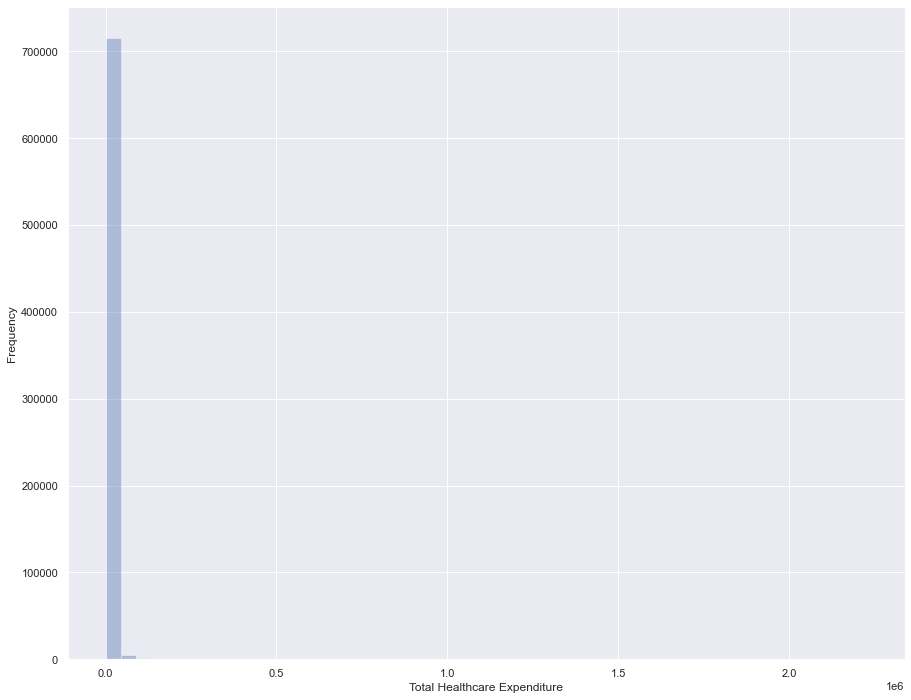

In [4]:
sns.distplot(health_data['TOTEXP'], bins=50, kde=False)
plt.xlabel("Total Healthcare Expenditure")
plt.ylabel("Frequency")

In order to eliminate the impact of noise in the visualtion, we clip values over \$30,000. 

Text(0, 0.5, 'Frequency')

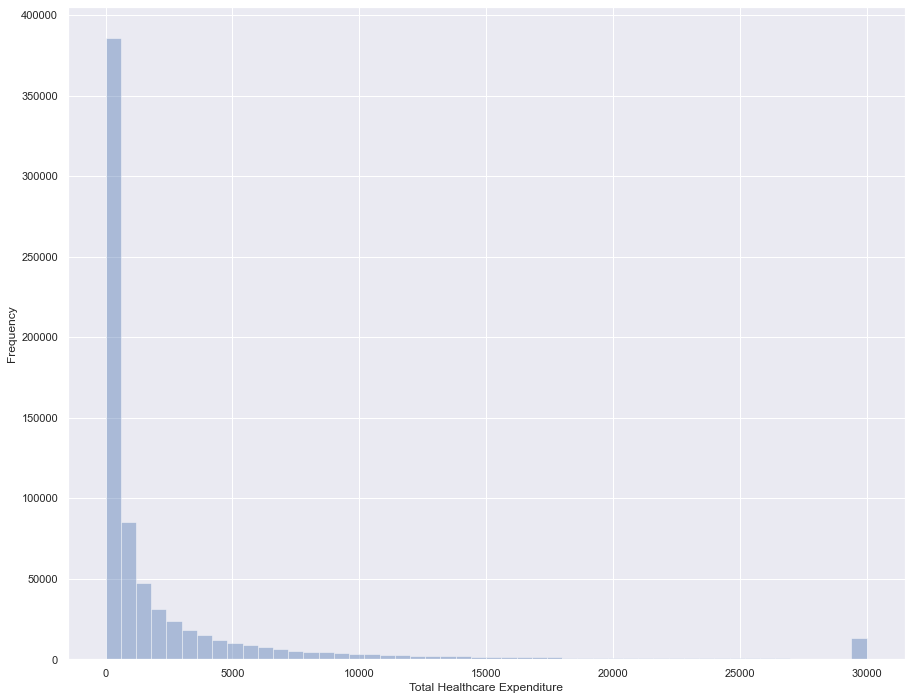

In [5]:
sns.distplot(health_data['TOTEXP'].clip(upper=30000), bins=50, hist=True, kde=False)
plt.xlabel("Total Healthcare Expenditure")
plt.ylabel("Frequency")

Since there are too many zeros in the total healthcare expenditure, and it is exponentially distributed, we can visualise the data in a different form too.

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

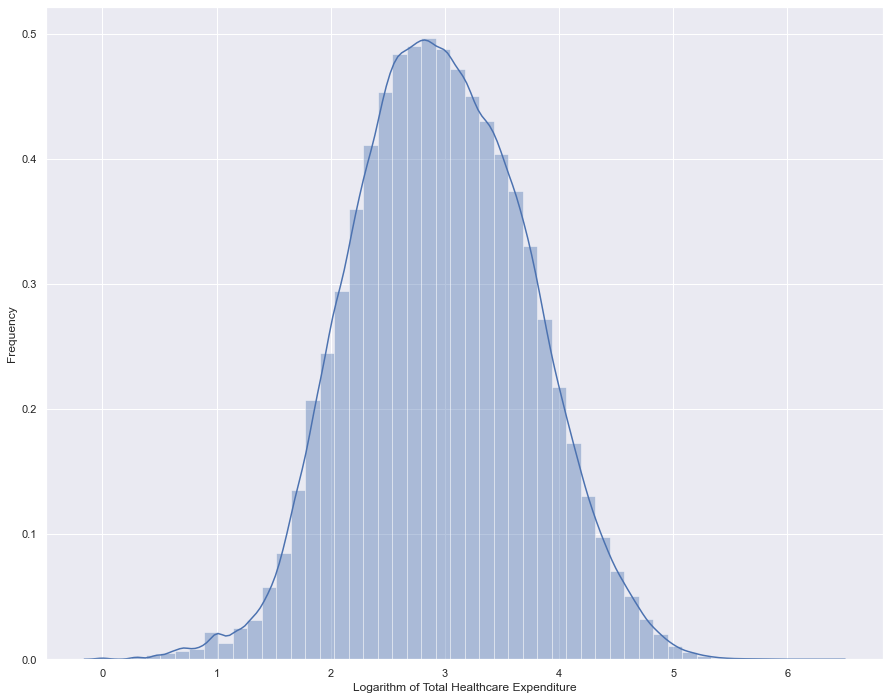

In [6]:
health_data['logTOTEXP'] = np.log10(health_data['TOTEXP'])
sns.distplot(health_data[health_data['TOTEXP']>0]['logTOTEXP'], bins=50)
plt.xlabel("Logarithm of Total Healthcare Expenditure")
plt.ylabel("Frequency")

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


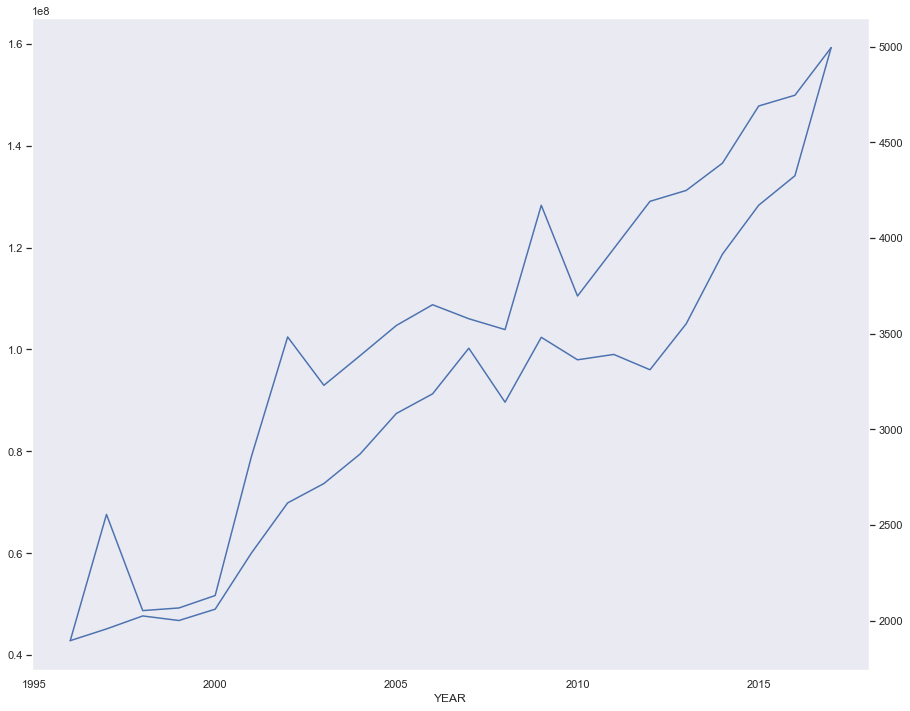

In [7]:
tot_exp = health_data.groupby('YEAR').sum()['TOTEXP']
ave_exp = health_data.groupby('YEAR').mean()['TOTEXP']
g1 = sns.lineplot(tot_exp.index, tot_exp.values)
g1.grid(False)
ax2 = plt.twinx()
g2 = sns.lineplot(ave_exp.index, ave_exp.values, ax=ax2)
g2.grid(False)
plt.xlabel("Year")
plt.show()


**Gender VS Healthcare Expenditure:**

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

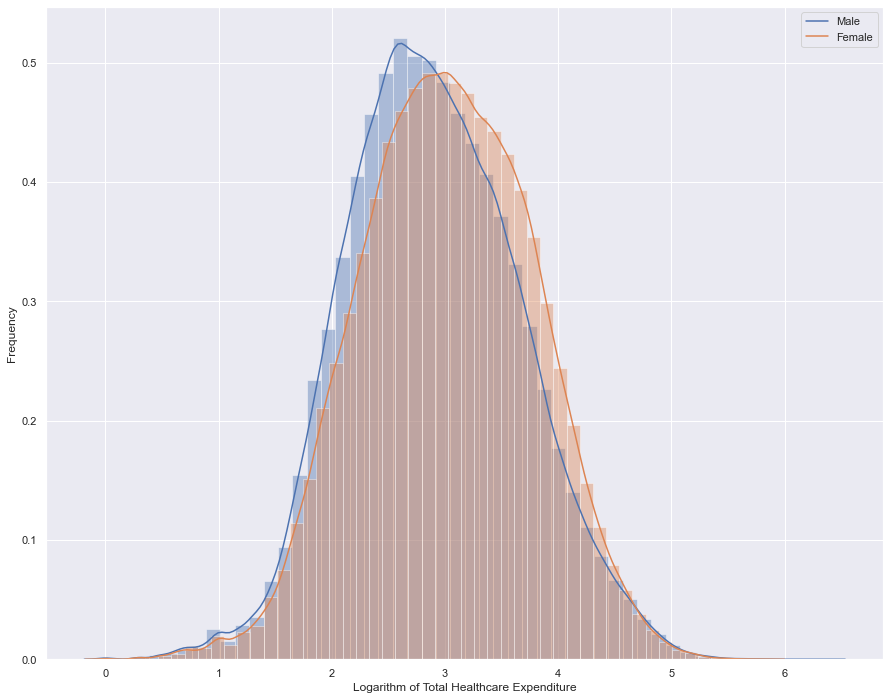

In [8]:
for item in ['Male', 'Female']:
    sns.distplot(health_data[(health_data['TOTEXP']>0)&(health_data['SEX']==item)]['logTOTEXP'], bins=50)
plt.legend(['Male', 'Female'])
plt.xlabel("Logarithm of Total Healthcare Expenditure")
plt.ylabel("Frequency")

**Age vs Healthcare Expenditure:**

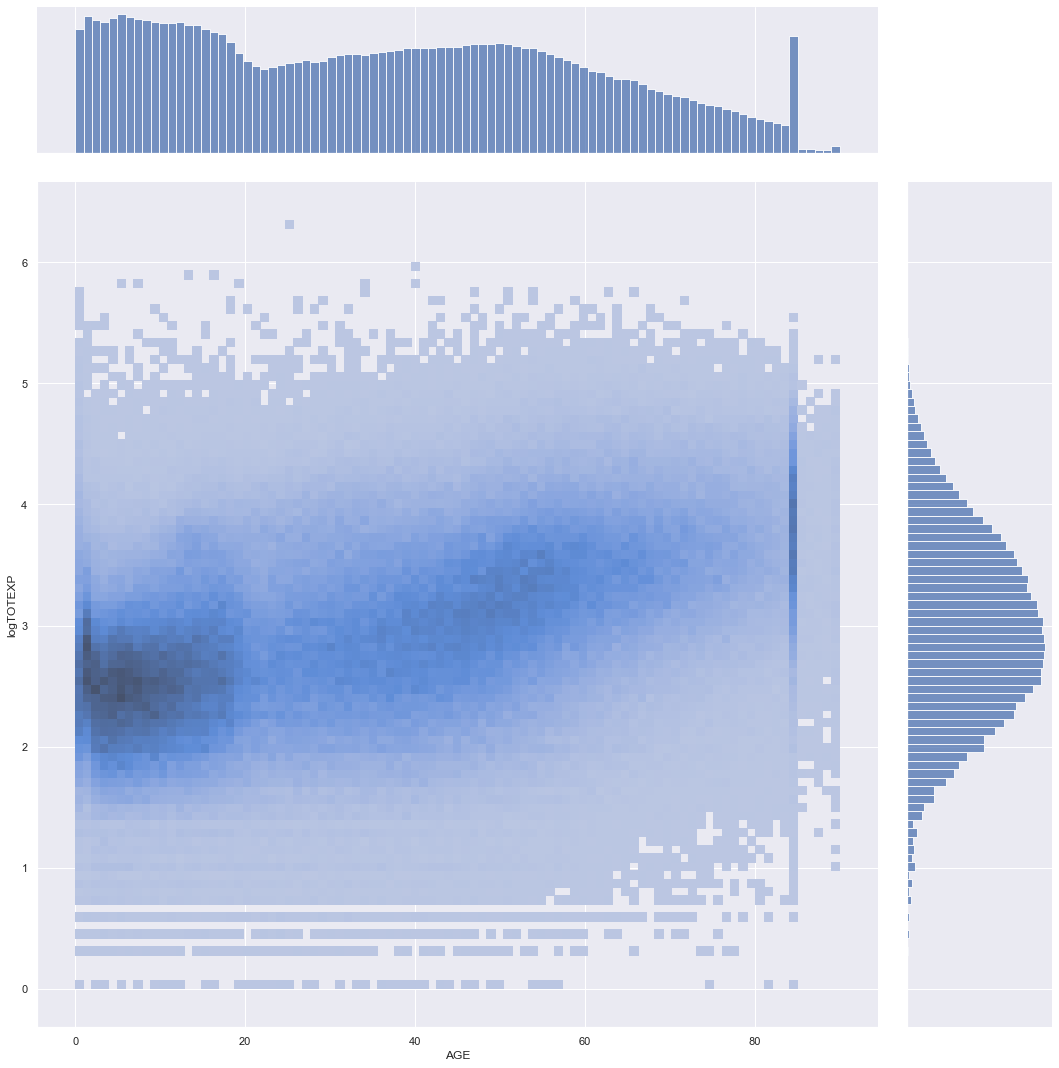

In [9]:
health_data['DOBYY'] = health_data['DOBYY'].apply(lambda x: x if x>0 else np.nan)
sns.jointplot(x = "AGE", y = "logTOTEXP", data = health_data[(health_data['TOTEXP']>0)], kind='hist', height=15, joint_kws={'bins':91}, marginal_kws={'bins':91})

**Education vs Healthcare Expenditure:**

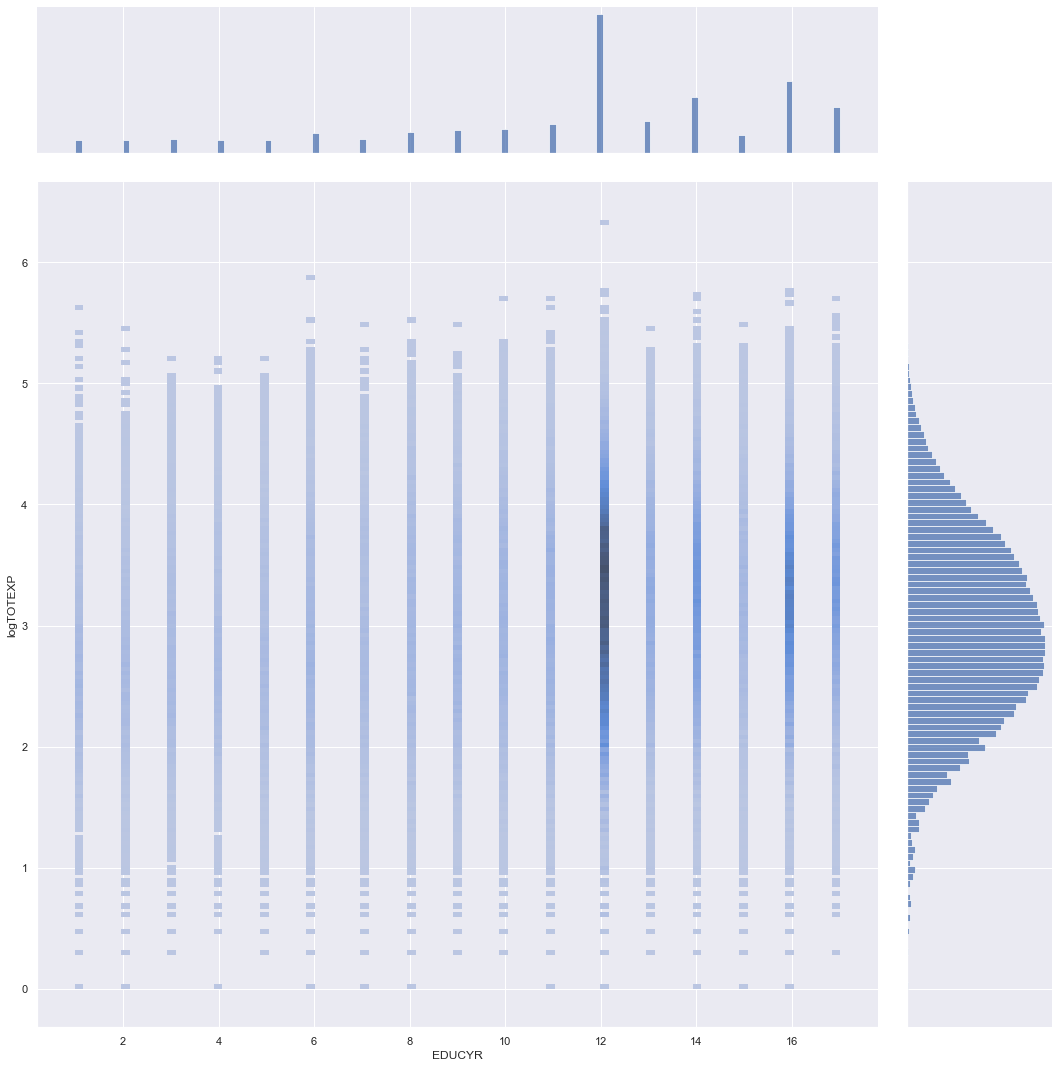

In [12]:
health_data['EDUCYR'] = health_data['EDUCYR'].apply(lambda x: x if x>0 else np.nan)
sns.jointplot(x = "EDUCYR", y = "logTOTEXP", data = health_data[(health_data['TOTEXP']>0)], kind='hist', height=15, marginal_kws={'bins':113})

## Healthcare Utilisation

Now let's see how data looks like for healthcare utilisation. First variable that proxy for the healthcare utilisation is OBTOTV, or Office-based Provider Total Visits.

Text(0, 0.5, 'Frequency')

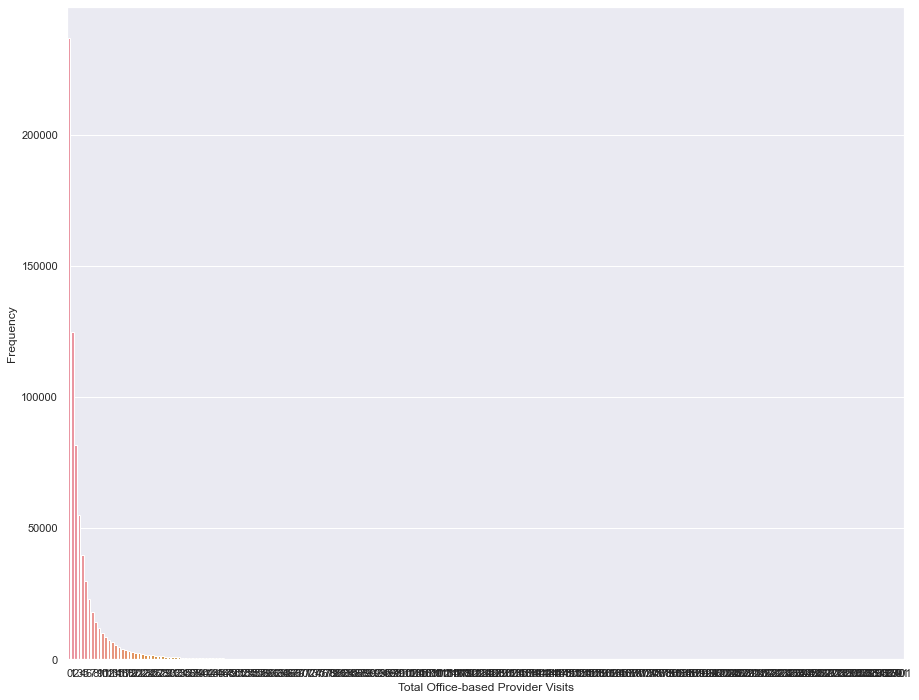

In [13]:
or_visits = health_data['OBTOTV'].groupby(health_data['OBTOTV']).count()
sns.barplot(x = or_visits.index, y=or_visits)
plt.xlabel("Total Office-based Provider Visits")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

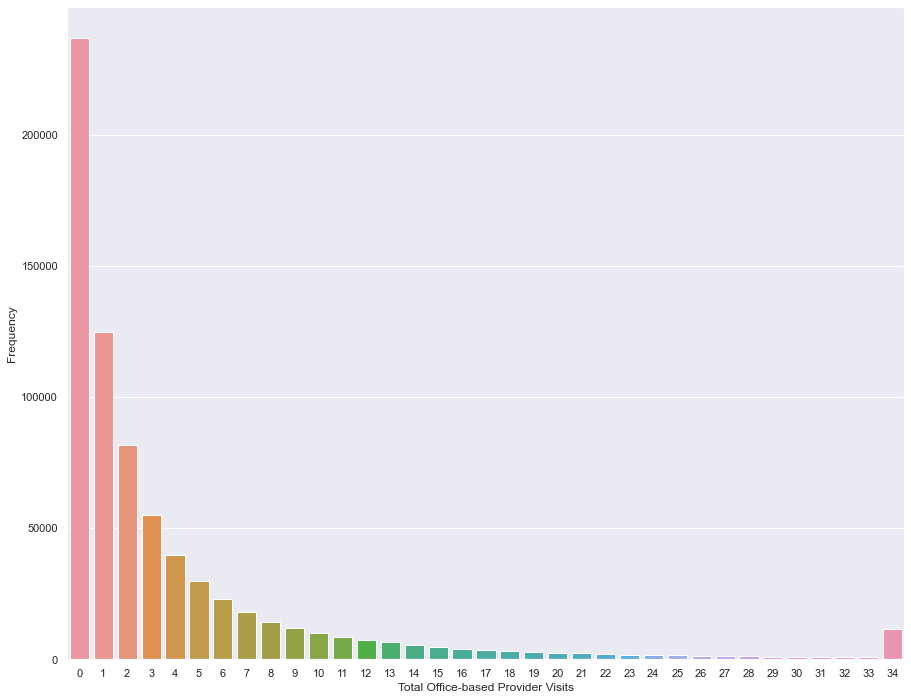

In [14]:
or_visits = health_data['OBTOTV'].clip(upper=34.).groupby(health_data['OBTOTV'].clip(upper=34.)).count()
sns.barplot(x = or_visits.index, y=or_visits)
plt.xlabel("Total Office-based Provider Visits")
plt.ylabel("Frequency")

**Gender VS Healthcare Utilisation:**

C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

Text(0, 0.5, 'Frequency')

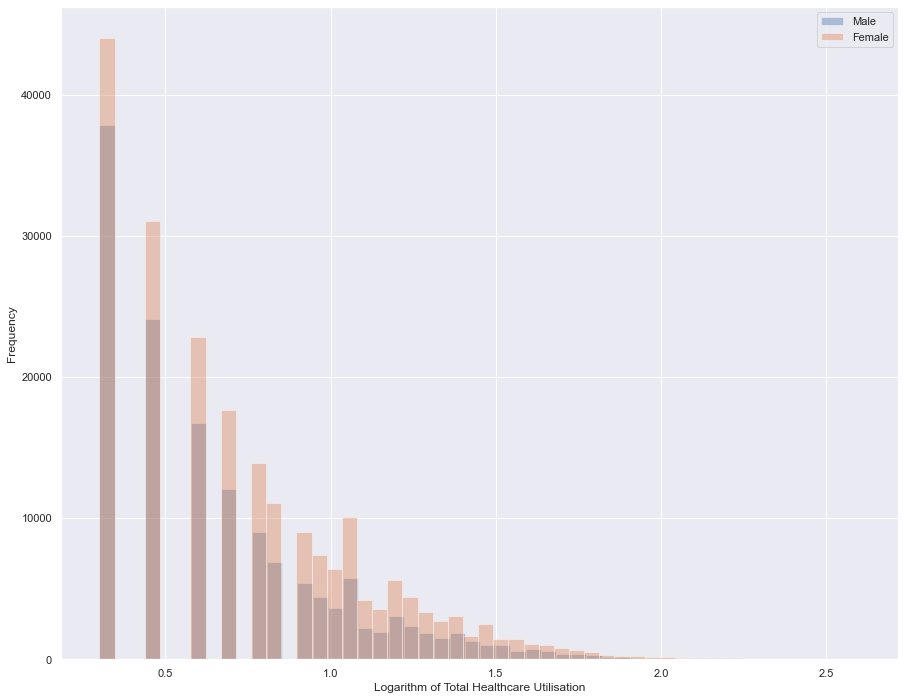

In [15]:
health_data['logOBTOTV'] = np.log10(health_data['OBTOTV'])
for item in ['Male', 'Female']:
    sns.distplot(health_data[(health_data['logOBTOTV']>0)&(health_data['SEX']==item)]['logOBTOTV'], bins=50, kde=False)
plt.legend(['Male', 'Female'])
plt.xlabel("Logarithm of Total Healthcare Utilisation")
plt.ylabel("Frequency")

**Age vs Healthcare Utilisation:**

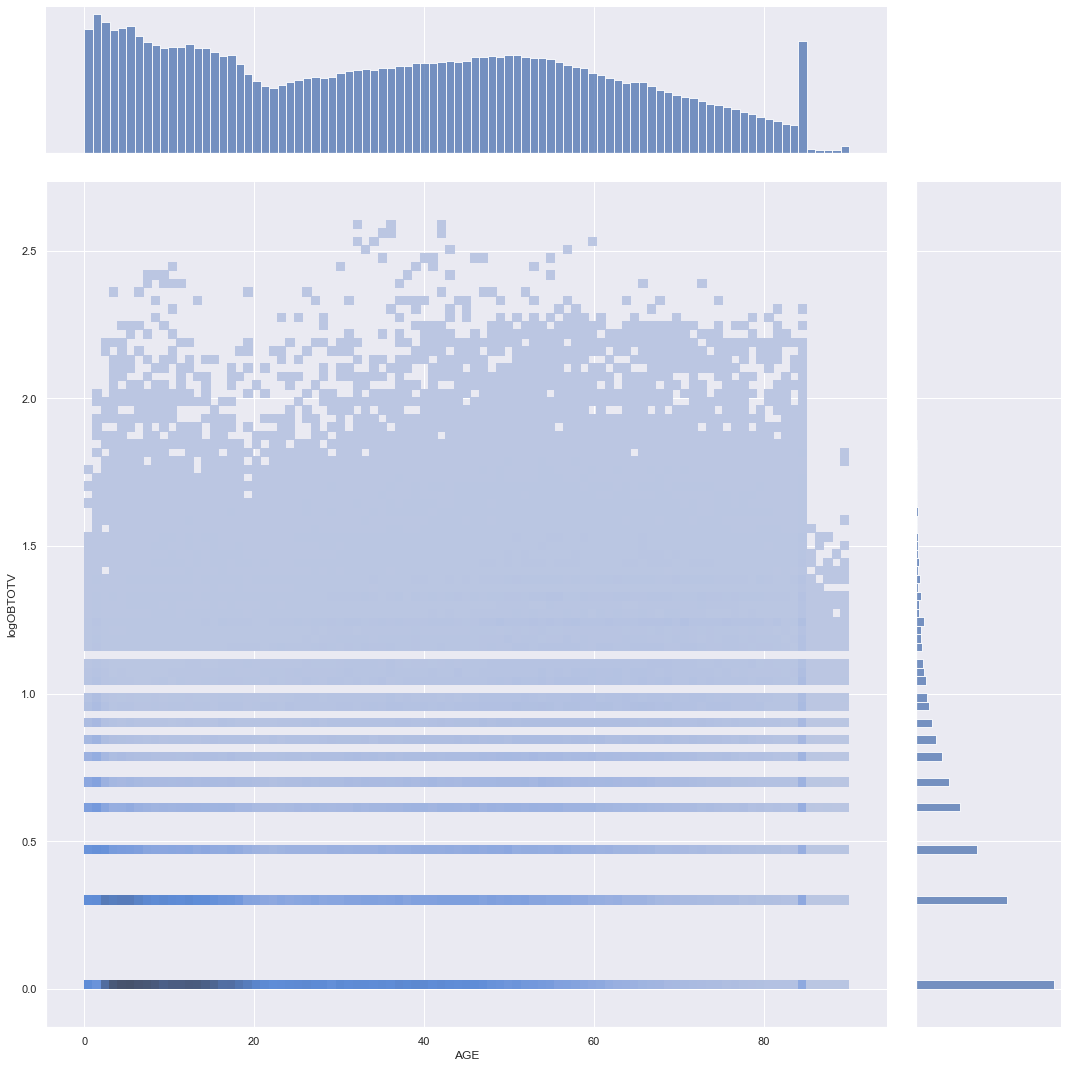

In [16]:
sns.jointplot(x = "AGE", y = "logOBTOTV", data = health_data[(health_data['OBTOTV']>0)], kind='hist', height=15, joint_kws={'bins':91}, marginal_kws={'bins':91})

**Education vs Healthcare Utilisation:**

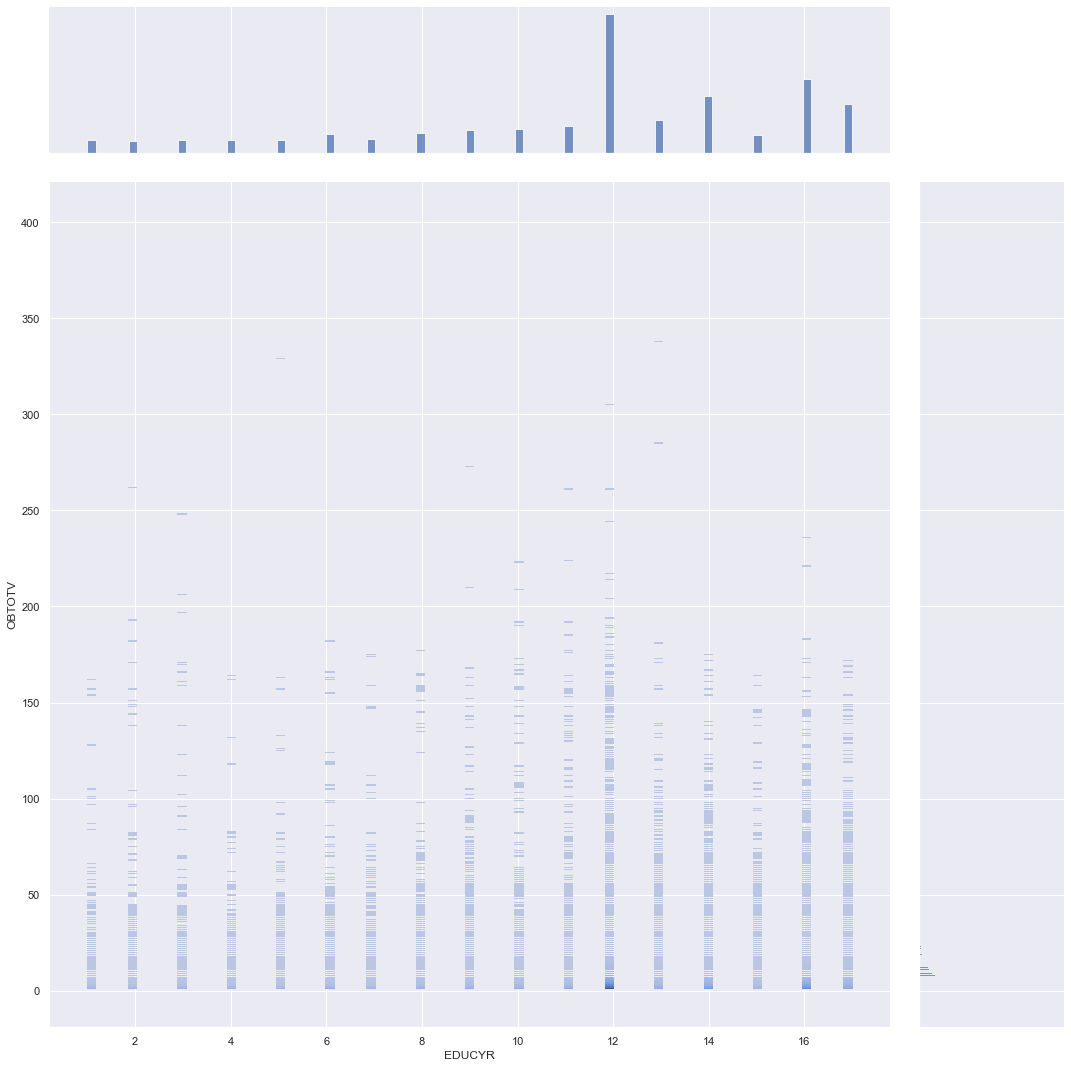

In [17]:
sns.jointplot(x = "EDUCYR", y = "OBTOTV", data = health_data[(health_data['OBTOTV']>0)], kind='hist', height=15)

# Linear Regression Models

In this section, we will be looking at a generalised linear regression models. 

Let's first examine how our main variables of interest are related to the total expenditure.

In [20]:
model = smf.glm(formula='TOTEXP ~ AGE + TTLPX + C(EDUCYR) + C(MARRYX) + C(SEX) + C(RACE)', family=sm.families.Gaussian(), data = health_data).fit(cov_type='HC3')
print(model.summary())

LinAlgError: Singular matrix

In the model below, we testing whether having diagnosed with a particular disease is going to impact the total expenditure.

In [ ]:
model = smf.glm(formula='TOTEXP ~ AGE + TTLPX + EDUCYR + C(MARRYX) + C(SEX) + C(RACE) + ASTHDX + CANCERDX + CHOLAGED + DIABDX + HIBPDX + CHDDX + MIDX + STRKDX', family=sm.families.Gaussian(), data = health_data).fit(cov_type='HC3')
print(model.summary())

How about hospital utilisation.

In [ ]:
model = smf.glm(formula='OBTOTV ~ AGE + TTLPX + EDUCYR + C(MARRYX) + C(SEX) + C(RACE)', family=sm.families.Gaussian(), data = health_data).fit(cov_type='HC3')
print(model.summary())

In [ ]:
model = smf.glm(formula='OBTOTV ~ AGE + TTLPX + EDUCYR + C(MARRYX) + C(SEX) + C(RACE) + ASTHDX + CANCERDX + CHOLAGED + DIABDX + HIBPDX + CHDDX + MIDX + STRKDX', family=sm.families.Gaussian(), data = health_data).fit(cov_type='HC3')
print(model.summary())